                                                          Amazon Sales Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\vishw\Downloads\AMAZON SALES\AMAZON SALES\Amazon Sale Report.csv")
df
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.00,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.00,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.00,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.00,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.00,IN,False,NaN,NaN,NaN


In [9]:
df.shape

(128976, 21)

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [352]:
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


In [33]:
duplicates = df[df.duplicated()]
duplicates

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
201,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,653.00,CHANDIGARH,CHANDIGARH,160036.00,IN,False,Unknown
202,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032.00,IN,False,Easy Ship
203,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,INR,648.56,HYDERABAD,TELANGANA,500008.00,IN,False,Unknown
204,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,1,INR,363.00,Chennai,TAMIL NADU,600041.00,IN,False,Unknown
205,10,407-5633625-6970741,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,1,INR,685.00,CHENNAI,TAMIL NADU,600073.00,IN,False,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,6278,171-5170733-7855514,04-26-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,XS,Shipped,1,INR,582.00,HYDERABAD,TELANGANA,500083.00,IN,False,Easy Ship
6641,6279,403-8137343-5206760,04-26-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,XS,Shipped,1,INR,801.00,KALPETTA,KERALA,673122.00,IN,False,Easy Ship
6642,6280,408-1575454-3263526,04-26-22,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,Blazzer,M,Shipped,1,INR,690.00,CHENNAI,TAMIL NADU,600049.00,IN,False,Easy Ship
6643,6281,171-2918708-7197155,04-26-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Blazzer,XXL,Shipped,1,INR,658.00,PUNE,MAHARASHTRA,412207.00,IN,False,Easy Ship


In [5]:
#Knowning the no of null values
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [6]:
# Deleting of empty columns
df=df.drop(columns=['New','PendingS'])
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.00,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.00,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.00,IN,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.00,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.00,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.00,IN,False,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.00,IN,False,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.00,IN,False,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350.00,IN,False,NaN


In [7]:
df.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
fulfilled-by           object
dtype: object

In [8]:
#Filling null values,for currency col with forward filling and amount col with mean 
df['currency']=df['currency'].ffill()
df['Amount']=df['Amount'].fillna(df['Amount'].mean())
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [10]:
df['ship-country'].value_counts()

ship-country
IN    128976
Name: count, dtype: int64

In [9]:
# filling categorical data with unknown 
df['ship-city']=df['ship-city'].fillna('Unknown')
df['ship-state']=df['ship-state'].fillna('Unknown')
df['ship-postal-code']=df['ship-postal-code'].fillna('Unknown')
df['ship-country']=df['ship-country'].fillna('IN')
df['fulfilled-by']=df['fulfilled-by'].fillna('Unknown')
df.isnull().sum()


index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [11]:
# Finding the sales by channels 
sales_by_channel = df.groupby('Sales Channel')['Amount'].sum().sort_values(ascending=False)
print(sales_by_channel)

Sales Channel
Amazon.in    83568533.51
Non-Amazon      80421.71
Name: Amount, dtype: float64


In [366]:
df['Status'].value_counts()

Status
Shipped                          77815
Shipped - Delivered to Buyer     28756
Cancelled                        18334
Shipped - Returned to Seller      1954
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

In [368]:
#Finding which products are delivered and which are cancelled
delivered_products = df[df['Status'] == 'Shipped - Delivered to Buyer'][['Category', 'Status']]
cancelled_products = df[df['Status'] == 'Cancelled'][['Category', 'Status']]
print("Delivered Products:")
print(delivered_products)
print("\nCancelled Products:")
print(cancelled_products)

Delivered Products:
        Category                        Status
1          Shirt  Shipped - Delivered to Buyer
7          Shirt  Shipped - Delivered to Buyer
12         Shirt  Shipped - Delivered to Buyer
14       T-shirt  Shipped - Delivered to Buyer
15         Shirt  Shipped - Delivered to Buyer
...          ...                           ...
128873   Perfume  Shipped - Delivered to Buyer
128874   T-shirt  Shipped - Delivered to Buyer
128875   T-shirt  Shipped - Delivered to Buyer
128888  Trousers  Shipped - Delivered to Buyer
128892   Blazzer  Shipped - Delivered to Buyer

[28756 rows x 2 columns]

Cancelled Products:
        Category     Status
0        T-shirt  Cancelled
3        Blazzer  Cancelled
8        T-shirt  Cancelled
23       T-shirt  Cancelled
29         Shirt  Cancelled
...          ...        ...
128962   Blazzer  Cancelled
128963     Shirt  Cancelled
128966  Trousers  Cancelled
128968     Shirt  Cancelled
128970   T-shirt  Cancelled

[18334 rows x 2 columns]


In [24]:
#finding the sales by the eah category 
sales_by_category = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
print(sales_by_category)
top_categories = sales_by_category.head(5)
print("Top 5 Product Categories by Sales Amount:")
print(top_categories)

Category
T-shirt    39206756.65
Shirt      21297770.08
Blazzer    11215104.12
Trousers    5346286.30
Perfume      789419.66
Wallet       458408.18
Socks        150757.50
Shoes        124752.76
Watch           915.00
Name: Amount, dtype: float64
Top 5 Product Categories by Sales Amount:
Category
T-shirt    39206756.65
Shirt      21297770.08
Blazzer    11215104.12
Trousers    5346286.30
Perfume      789419.66
Name: Amount, dtype: float64


In [21]:
# Finding the product which was sold most
count_cate=df.groupby('Category')['Order ID'].count()
max_cate=count_cate.idxmax()
max=count_cate.max()
print(f"The product that was sold the most is {max_cate} with {max} orders")

The product that was sold the most is T-shirt with 50292 orders


In [372]:
# finding the state that got more orders
moreOrders_stateship=df.groupby('ship-state')['Order ID'].count()
maxid=moreOrders_stateship.idxmax()
print(moreOrders_stateship)
print(f"the state that got more shipping order is {maxid}")

ship-state
ANDAMAN & NICOBAR     256
ANDHRA PRADESH       5427
APO                     1
AR                      1
ARUNACHAL PRADESH     141
                     ... 
goa                     5
orissa                  1
punjab                 14
rajasthan               6
rajsthan                1
Name: Order ID, Length: 70, dtype: int64
the state that got more shipping order is MAHARASHTRA


In [374]:
#Finding the count of fulfilment
coun=df["Fulfilment"].value_counts()
print(coun)

Fulfilment
Amazon      89713
Merchant    39263
Name: count, dtype: int64


In [25]:
# Sales amount by Fulfillment 
sales_by_fulfilment = df.groupby('Fulfilment')['Amount'].sum().sort_values(ascending=False)
print(sales_by_fulfilment)

Fulfilment
Amazon     54327540.00
Merchant   24262630.25
Name: Amount, dtype: float64


In [378]:
#finding count of fulfilment with respective with category
category_fulfilment_count = df.groupby(['Category', 'Fulfilment'])['Order ID'].count().reset_index()
category_fulfilment_count = category_fulfilment_count.rename(columns={'Order ID': 'Count'})
print(category_fulfilment_count)

    Category Fulfilment  Count
0    Blazzer     Amazon   8533
1    Blazzer   Merchant   6967
2    Perfume     Amazon    848
3    Perfume   Merchant    309
4      Shirt     Amazon  35636
5      Shirt   Merchant  14241
6      Shoes     Amazon    133
7      Shoes   Merchant     32
8      Socks     Amazon    249
9      Socks   Merchant    191
10   T-shirt     Amazon  35552
11   T-shirt   Merchant  14740
12  Trousers     Amazon   8067
13  Trousers   Merchant   2549
14    Wallet     Amazon    692
15    Wallet   Merchant    234
16     Watch     Amazon      3


In [380]:
# finding  the highest amount and printing its category for which it belongs to
max_val=df['Amount'].max()
cat_maxVal=df[df['Amount']==max_val]['Category'].values[0]
print(f"the highest amount  from the data is {max_val} and which is {cat_maxVal}")

the highest amount  from the data is 5584.0 and which is T-shirt


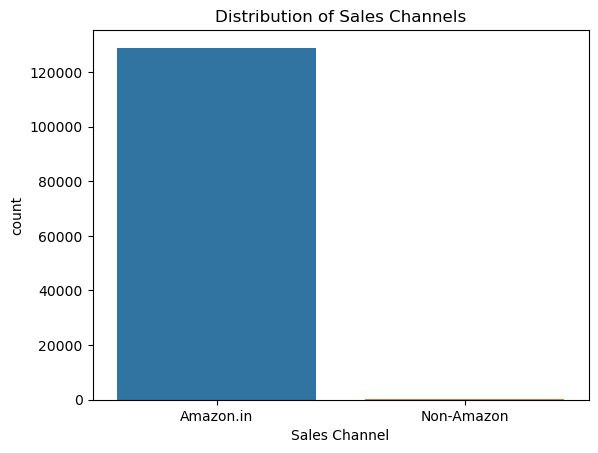

In [324]:
#Visualize the sales Channels using countplot
sns.countplot(x='Sales Channel', data=df)
plt.title('Sales Channels')
plt.show()


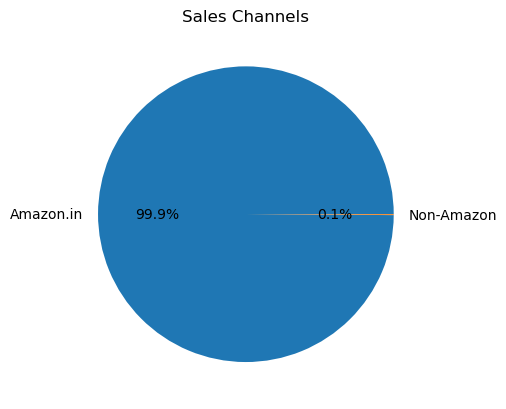

In [444]:
#Visualize the sales Channels using pie chart
sales_channel_counts = df['Sales Channel'].value_counts()
plt.pie(sales_channel_counts, labels=sales_channel_counts.index, autopct='%1.1f%%')
plt.title('Sales Channels')
plt.show()

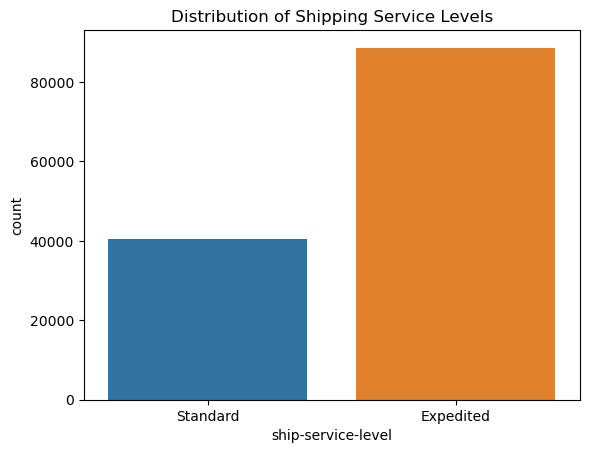

In [452]:
# Visualize the shipping services  using countplot
sns.countplot(x='ship-service-level', data=df)
plt.title('Shipping Service Levels')
plt.show()

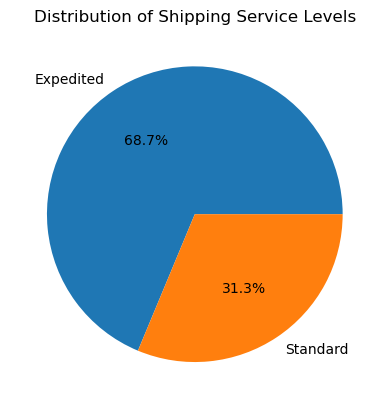

In [458]:
#Visualize the shipping services using pie chart
service_level_counts = df['ship-service-level'].value_counts()
plt.pie(service_level_counts, labels=service_level_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Shipping Service Levels')
plt.show()

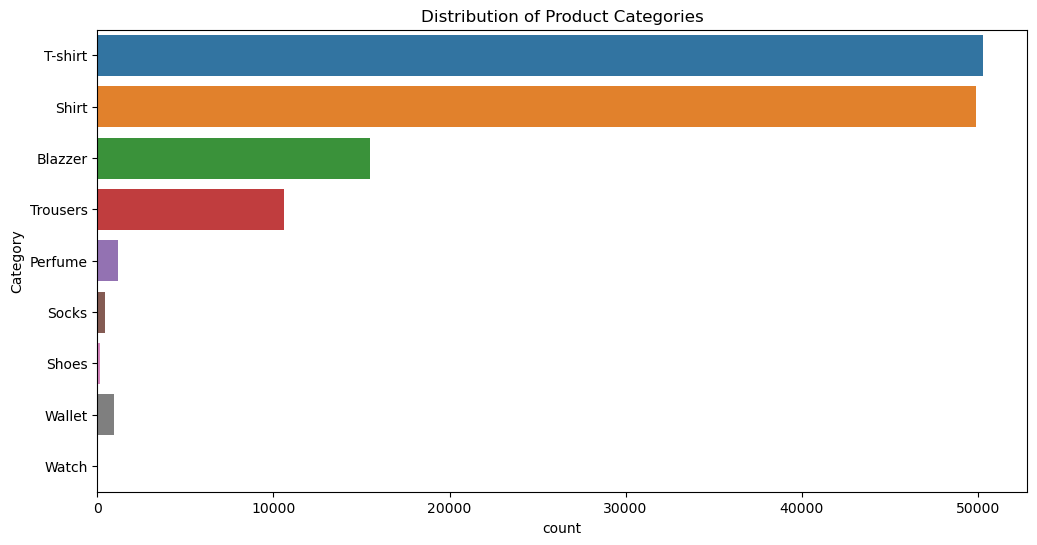

In [448]:
# Visualize the iteams in the data using countplot
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=df)
plt.title('Distribution of Product Categories')
plt.show()

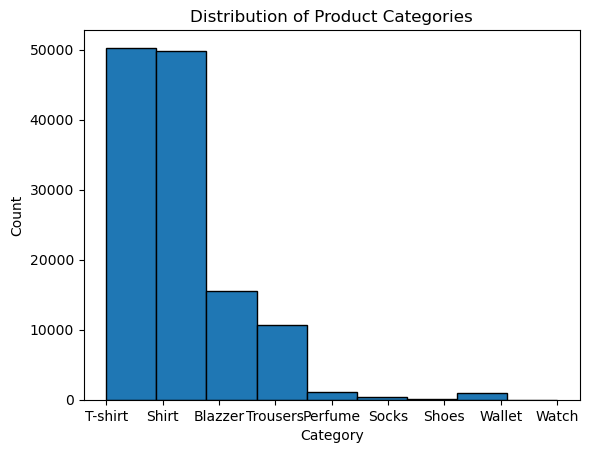

In [450]:
# Visualize the iteams in the data using histogram
plt.hist(df['Category'], bins=len(df['Category'].value_counts()), edgecolor='black')
plt.title('Distribution of Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

INSIGHTS
* The top-selling product is T-shirts.Both in terms of sales volume and customer preference, T-shirts are the most popular choice. 
*  Sales through Amazon.in channels are higher compared to other sales channels.This indicates that Amazon.in is the primary platform for sales, which could be due to its wide reach, customer trust, or other factors.
* he most common shipping method used is expedited shipping.Customers prefer expedited shipping, likely for faster delivery. This preference might impact shipping cost calculations and customer satisfaction. 
